# Numerical Integration

We'll work through a few examples with numerical integration, then feel free to start Homework 2.

### Example 5.1

Consider the integral $\int_{0}^{2} ( x^4 - 2x + 1)dx$ from $x=0$ to $x=2$. We can easily solve this analytically (you should do so), so it is a good candidate to test the trapezoid rule.

- Define a function for the expression to be integrated
- Define a function to do the integrating; plan ahead and pass N_steps as an argument
- Integrate the function with 10, 100, and 1000 steps. How does it compare to the analytic answer of 4.4?

In [11]:
# code
import numpy as np

def f_1(x):
    return x**4 - 2*x + 1

def trapezoidSum(function, a, b, N_steps):
    h = (b-a) / N_steps
    total = 0.5*h * function(a) + 0.5*h * function(b)

    for k in range(1,N_steps):
        total += h * function(a + k*h)

    return total

print(trapezoidSum(f_1, 0, 2, 10))
print(trapezoidSum(f_1, 0, 2, 100))
print(trapezoidSum(f_1, 0, 2, 1000))
print(trapezoidSum(f_1, 0, 2, 10000))
print(trapezoidSum(f_1, 0, 2, 100000))
print(trapezoidSum(f_1, 0, 2, 1000000))

4.506560000000001
4.401066655999999
4.400010666665598
4.400000106666669
4.400000001066635
4.400000000010628


### Exercise 5.1

Read in the file `velocities.txt`, which describes the velocity of a particle over time.

Use trapezoids to determine the position of the particle at each time step.

Graph both velocity and position as a function of time.

There are multiple ways to think about this problem, but naturally they will all get you to a mathematically identical answer. A pleasantly simple solution can be found by considering the basic definition of the aread of a trapezoid. Or you may consider Eq. 5.3 in the text and see how it simplifies for this data set. Or you may wish to program the full trapezoid rule for this descrete data set (note your previous code probably won't work exactly since your "function" is now a descrete set of points). 

Text(0.5, 1.0, 'position and velocity versus time')

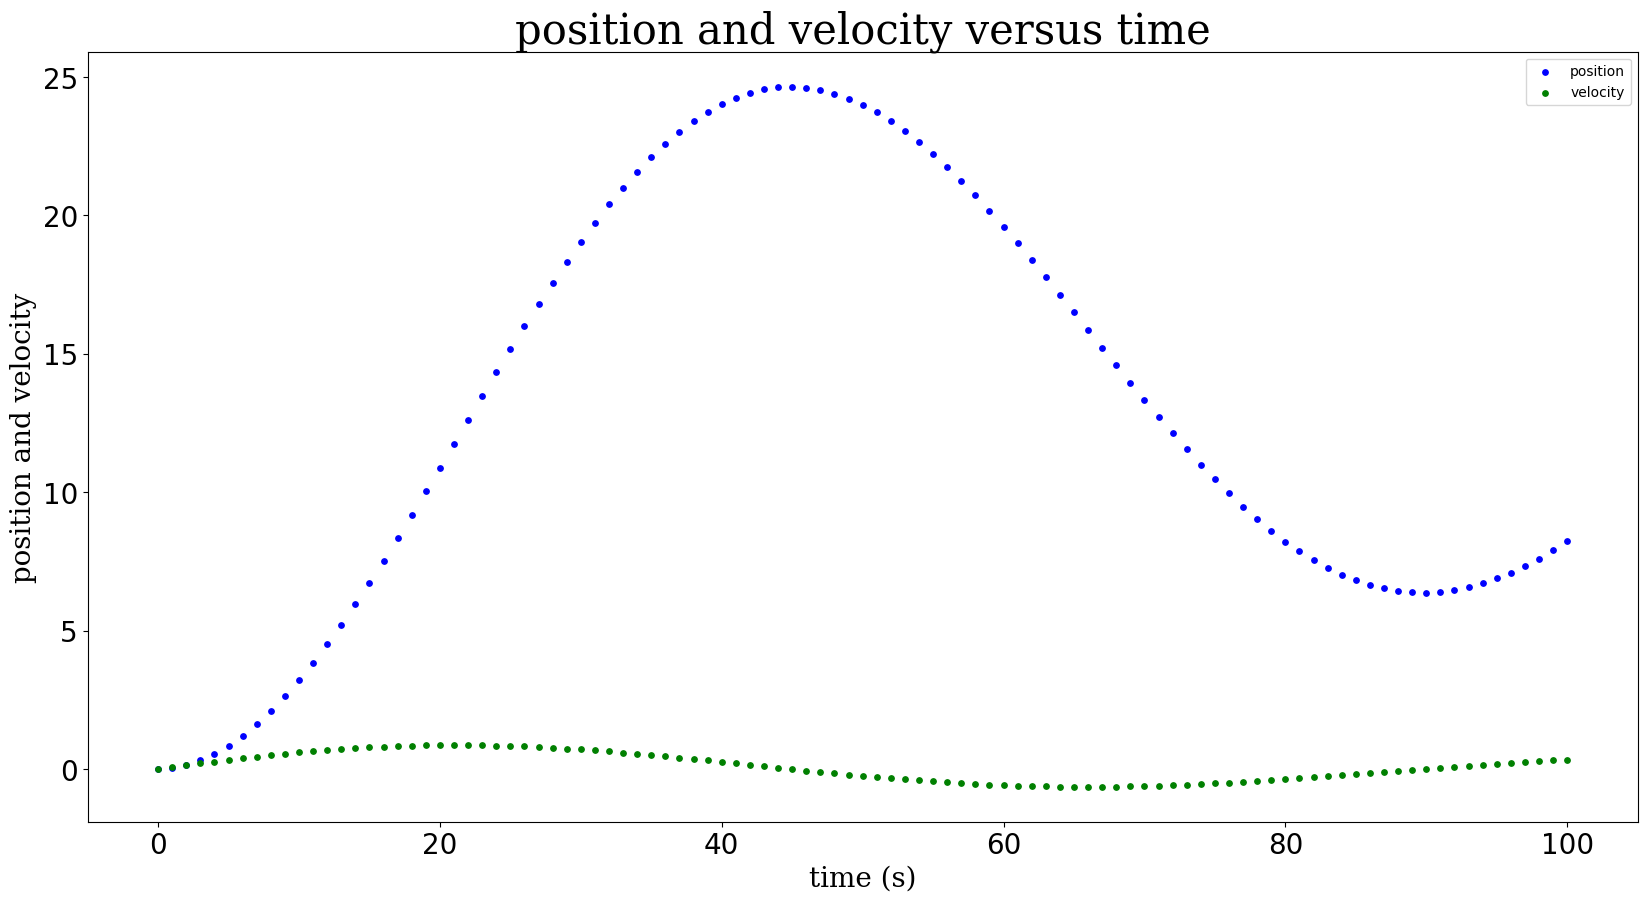

In [34]:
# code
from matplotlib import pyplot as plt

data = np.genfromtxt("velocities.txt", skip_header=1) 
time_points = data[:,0]
velocity_points = data[:,1]
position_points = np.zeros(len(time_points))

for i in range(1, len(time_points)):
    position_points[i] = 0.5 * (velocity_points[i-1] + velocity_points[i]) + position_points[i-1]

#plotting
fig1 = plt.figure(figsize=(20,10))
ax1 = fig1.add_subplot(111)
ax1.scatter(time_points,position_points,s=15,c='b',alpha=1.0)
ax1.scatter(time_points,velocity_points,s=15,c='g',alpha=1.0)

ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)

LabelFont = {'family':'serif','color':'black','size':20}
TitleFont = {'family':'serif','color':'black','size':30}
plt.xlabel("time (s)", fontdict = LabelFont)
plt.ylabel("position and velocity", fontdict = LabelFont)
plt.legend(["position","velocity"])
plt.title("position and velocity versus time", fontdict = TitleFont)